In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from termcolor import colored

In [203]:
# Load in the dataframe
df = pd.read_csv("directory.csv", index_col=0)

In [204]:
# Looking at first 5 rows of the dataset
df.head()
df.tail()

,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
Brand,,,,,,,,,,,,
Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79
Starbucks,47609-253286,Mall of Africa,Licensed,"Shop 2077, Upper Level, Waterfall City",Midrand,GT,ZA,1682,27873500215,GMT+000000 Africa/Johannesburg,28.11,-26.02


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25600 entries, Starbucks to Starbucks
Data columns (total 12 columns):
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(10)
memory usage: 2.5+ MB


In [206]:
df.isnull().sum()

Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [209]:
df['sn']='1'

In [212]:
#df.drop(axis=1,columns='Phone Number',inplace=True)
df.dropna(axis=0, subset=['Longitude', 'Latitude'], inplace=True)
#df.drop(axis=1,columns='Postcode',inplace=True)

In [213]:
df.isnull().sum()

Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6860
Timezone             0
Longitude            0
Latitude             0
sn                   0
dtype: int64

In [183]:
first_ten_countries = df.Country.value_counts()[:10]
first_ten_countries

US    13608
CN     2734
CA     1468
JP     1237
KR      992
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

In [149]:
col = 'Country'
vc1 = df[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="Countries", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [150]:
country_names =  first_ten_countries.index
country_values = first_ten_countries.values

Text(0, 0.5, 'Size')

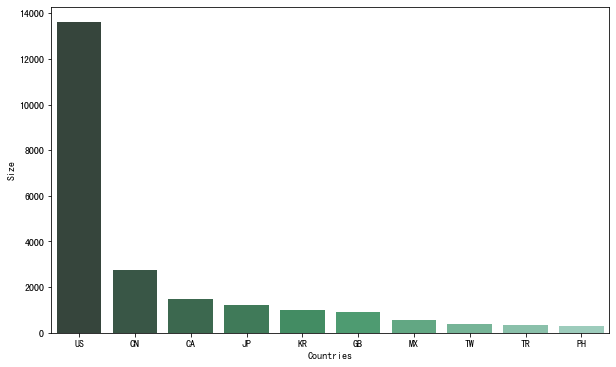

In [151]:
plt.figure(figsize=(10,6))

sns.barplot(x=country_names, y=country_values, data = df, palette="BuGn_d")
plt.xlabel('Countries')
plt.ylabel('Size')

In [152]:
first_ten_cities = df.City.value_counts()[:10]
first_ten_cities

上海市            542
Seoul          242
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Las Vegas      156
Seattle        156
Name: City, dtype: int64

In [153]:
city_names =  first_ten_cities.index
city_values = first_ten_cities.values

<Figure size 720x504 with 0 Axes>

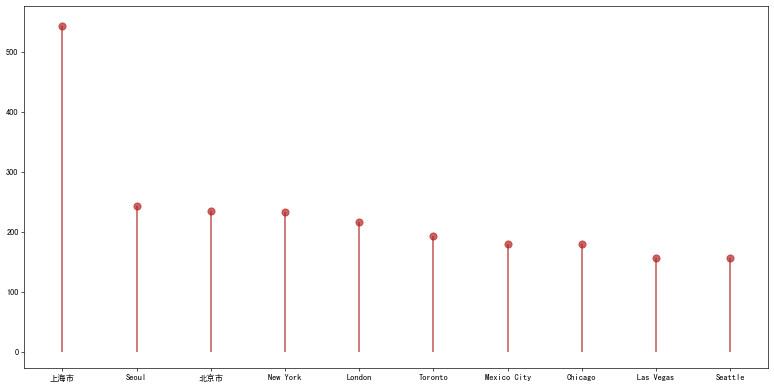

In [154]:
from pylab import *
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,7))

fig, ax = plt.subplots(figsize=(16,8), dpi= 60)
ax.vlines(x=city_names, ymin=0, ymax=city_values, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=city_names, y=city_values, s=75, color='firebrick', alpha=0.7)

How is the ownership structured for stores

In [155]:
df['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3975
Franchise          317
Name: Ownership Type, dtype: int64

In [156]:
col = 'Ownership Type'
vc1 = df[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], marker=dict(color="#6ad49b"))
data = [trace1]
layout = go.Layout(title="Ownership Type", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [157]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
col = "Ownership Type"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=400, legend=dict(x=0.01, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

So, most Starbucks stores are either owned by the company or licensed. 

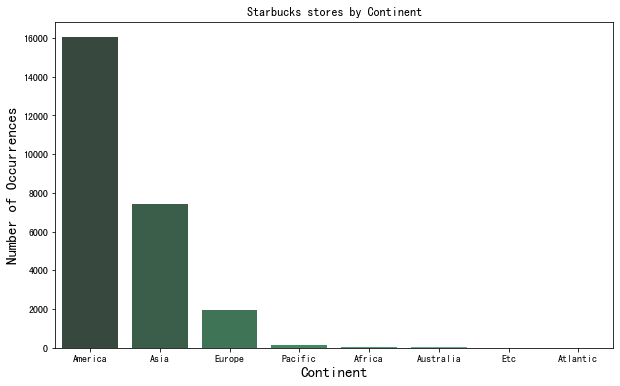

In [158]:
plt.figure(figsize=(10,6))
continents = df.Timezone.apply(lambda s: s.split('/')[0].split()[-1]).value_counts()

sns.barplot(continents.index, continents.values, palette="BuGn_d")
plt.title('Starbucks stores by Continent')
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Continent', fontsize=15)
plt.show()

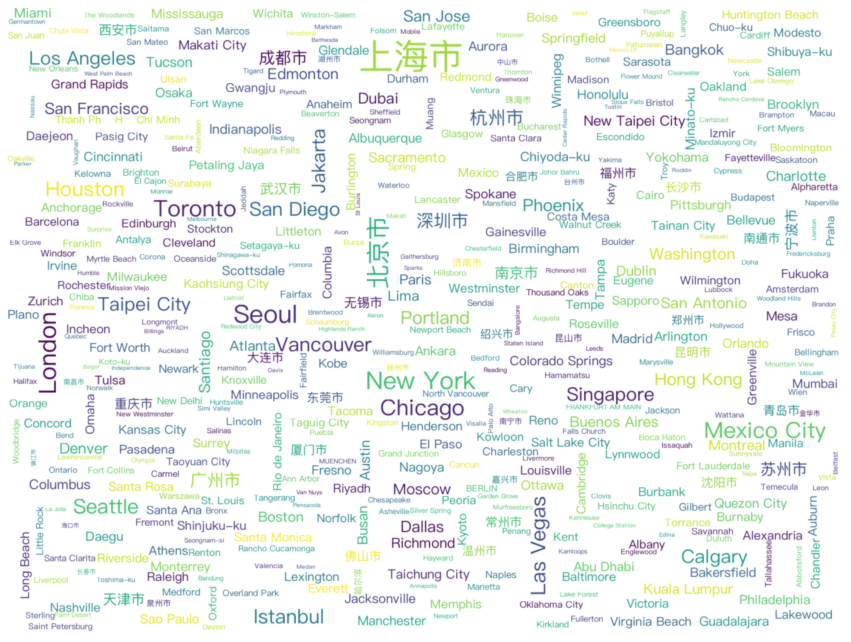

In [159]:
wordcloud = (WordCloud( max_words=500, width=1440, height=1080, max_font_size=60, min_font_size=10, relative_scaling=0.5,background_color='white',font_path = '/System/Library/Fonts/PingFang.ttc').generate_from_frequencies(df['City'].value_counts()))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud,interpolation="gaussian")
plt.axis('off')
plt.show()

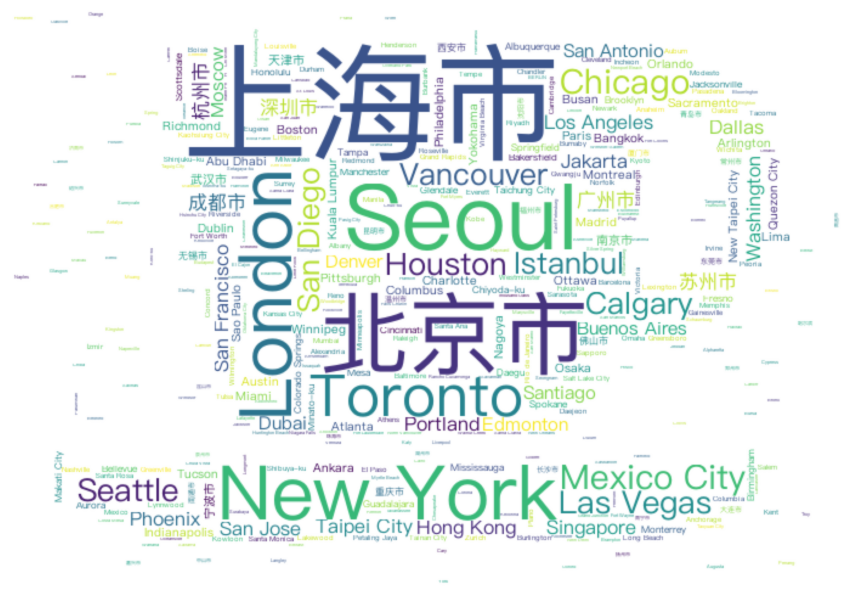

In [160]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
bg_img = imread('cup.jpg')
wordcloud = (WordCloud( mask=bg_img, max_words=1000, width=1440, height=1080,background_color='white',font_path = '/System/Library/Fonts/PingFang.ttc').generate_from_frequencies(df['City'].value_counts()))

plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud,interpolation="gaussian")
plt.axis('off')
plt.show()

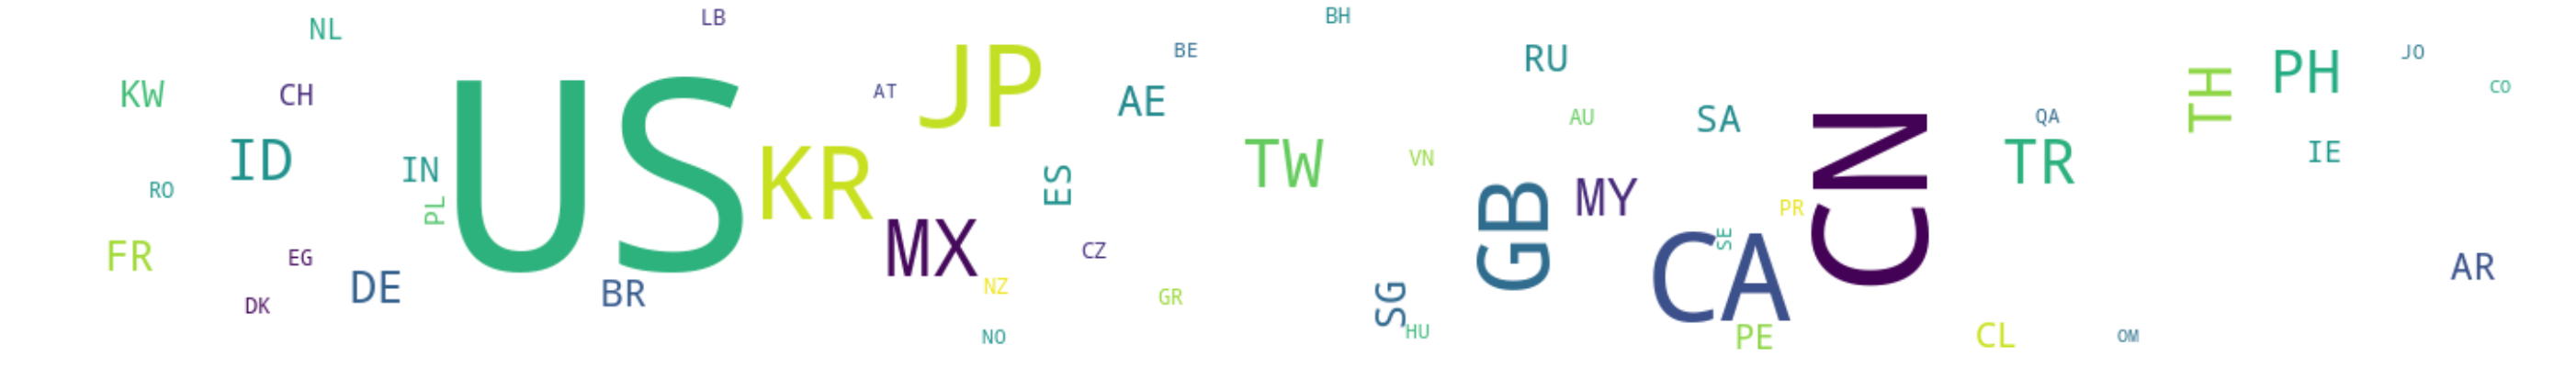

In [161]:
wordcloud = (WordCloud(max_words=50, width=1440, background_color='white',random_state = 30).generate_from_frequencies(df['Country'].value_counts()))

plt.figure(1,figsize=(50, 50))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [162]:
import folium

# define the world map
world_map = folium.Map()

# display world map
world_map

In [226]:
m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(df)):
    folium.Circle(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        color='red', 
        tooltip =   '<li><bold>Country : '+str(df.iloc[i]['Country'])+
                    '<li><bold>Province : '+str(df.iloc[i]['State/Province']),
        radius=int(df.iloc[i]['sn'])).add_to(m)
m
m.save("mmm.html")

In [163]:
df.head()

,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Timezone,Longitude,Latitude
Brand,,,,,,,,,,
Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,GMT+1:00 Europe/Andorra,1.53,42.51
Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.42
Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.39
Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,GMT+04:00 Asia/Dubai,54.38,24.48
Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,GMT+04:00 Asia/Dubai,54.54,24.51


In [227]:
# latitude and longitude values
latitude = 25.4
longitude = 55.5
# Create map and display it
p_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Display the map
p_map


In [228]:
p_map = folium.Map(location=[latitude, longitude], zoom_start=12, tiles='Stamen Toner')
p_map

When using folium, I encountered a problem: I couldn't successfully mark the data on the map.

In [229]:
# get the first 500 in the df
limit = 500
df1 = df.iloc[0:limit, :]

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df.Longitude, df1.Latitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7,
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.4
        )
    )
    
# Add incidents to map
p_map = folium.Map(location=[latitude, longitude], zoom_start=12)
p_map.add_child(incidents)
p_map.save(outfile = "test.html")